# Image processing: color reconstruction

In [45]:
# Import libraries that we need
import matplotlib.style
import matplotlib.pyplot as plt
import numpy as np
# Set the styles for the plots
matplotlib.style.use('seaborn-v0_8-bright')

(960, 1278)


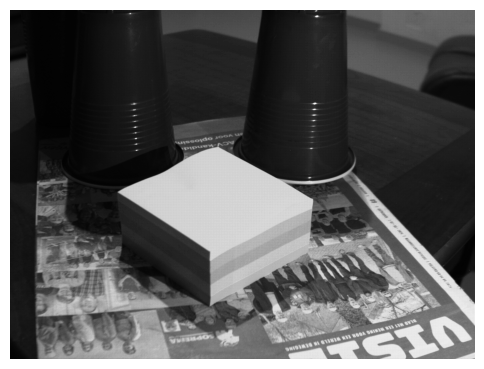

In [46]:
raw_fig = np.fromfile("E:\\RADMEP_stuff\\Semester_2_KU_Leuven\\KU_Leuven_learn\\Image_sensor\\Image_processing\\sample_images\\color_recon123.raw", dtype=np.uint16)
image_shape = (960,1278)
raw_fig = raw_fig.reshape(image_shape)
print(raw_fig.shape)
Fig_raw, ax_raw = plt.subplots(1,1, figsize = (6,5))
ax_raw.imshow(raw_fig, cmap = 'gray')
ax_raw.set_axis_off()
plt.savefig("E:\\RADMEP_stuff\\Semester_2_KU_Leuven\\KU_Leuven_learn\\Image_sensor\\Image_processing\\outputs"+"\\recon_raw.png", dpi =600)
plt.show()


In [47]:
r_filters = np.array([np.array([[0,0,0],[0,1,0],[0,0,0]]), 0.25*np.array([[0,1,0],[1,0,1],[0,1,0]]), 0.25*np.array([[1,0,1],[0,0,0],[1,0,1]])])
g1_filters = np.array([0.5*np.array([[0,0,0],[1,0,1],[0,0,0]]), np.array([[0,0,0],[0,1,0],[0,0,0]]), 0.5*np.array([[0,1,0],[0,0,0],[0,1,0]])])
g2_filters = np.array([0.5*np.array([[0,1,0],[0,0,0],[0,1,0]]), np.array([[0,0,0],[0,1,0],[0,0,0]]), 0.5*np.array([[0,0,0],[1,0,1],[0,0,0]])])
b_filters = np.array([0.25*np.array([[1,0,1],[0,0,0],[1,0,1]]), 0.25*np.array([[0,1,0],[1,0,1],[0,1,0]]), np.array([[0,0,0],[0,1,0],[0,0,0]])])
b_filters[2]

array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.]])

In [48]:
def bilinear_interpolation(ndraw):
    raw_shape = ndraw.shape # get the shape of the raw image
    full_img = np.zeros((raw_shape[0], raw_shape[1], 3)) # prepare empty array
    
    # kernel for each color pixel
    r_filters = np.array([np.array([[0,0,0],[0,1,0],[0,0,0]]), 0.25*np.array([[0,1,0],[1,0,1],[0,1,0]]), 0.25*np.array([[1,0,1],[0,0,0],[1,0,1]])])
    g1_filters = np.array([0.5*np.array([[0,0,0],[1,0,1],[0,0,0]]), np.array([[0,0,0],[0,1,0],[0,0,0]]), 0.5*np.array([[0,1,0],[0,0,0],[0,1,0]])])
    g2_filters = np.array([0.5*np.array([[0,1,0],[0,0,0],[0,1,0]]), np.array([[0,0,0],[0,1,0],[0,0,0]]), 0.5*np.array([[0,0,0],[1,0,1],[0,0,0]])])
    b_filters = np.array([0.25*np.array([[1,0,1],[0,0,0],[1,0,1]]), 0.25*np.array([[0,1,0],[1,0,1],[0,1,0]]), np.array([[0,0,0],[0,1,0],[0,0,0]])])
    
    #bayer_filter = np.array([[r_filters, g1_filters],[g2_filters, b_filters]])
    bayer_filter = np.array([[g1_filters, r_filters],[b_filters, g2_filters]])# GRBG
    #bayer_filter = np.array([[g1_filters, b_filters],[r_filters, g2_filters]])
    
    # pad the raw_shape array with zeros all around
    padded_raw = np.pad(ndraw, 1, mode = "constant")
    
    # Iterate through the image
    for i in range(raw_shape[0]):
        for j in range(raw_shape[1]):
            window = padded_raw[i:i+3, j:j+3]
            kernel = bayer_filter[i%2,j%2]
            for k in range(3):
                full_img[i][j][k] = window.ravel().dot(kernel[k].ravel())
                
    return full_img

In [49]:
colored_img = bilinear_interpolation(raw_fig)
colored_img.shape

(960, 1278, 3)

In [50]:
norm_colored = colored_img/4096

THE PATTERN IS GRBG, NOT RGGB!

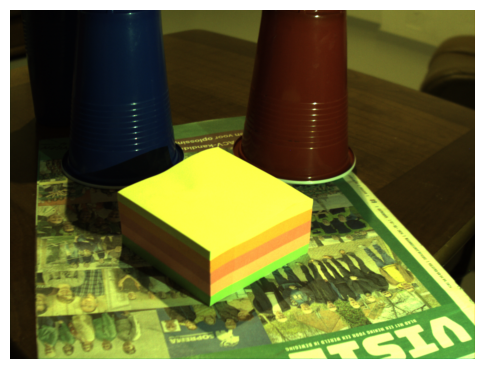

In [51]:
Fig, ax = plt.subplots(1,1, figsize = (6,5))
ax.imshow(norm_colored)
ax.set_axis_off()
plt.savefig("E:\\RADMEP_stuff\\Semester_2_KU_Leuven\\KU_Leuven_learn\\Image_sensor\\Image_processing\\outputs"+"\\recon_median.png", dpi =600)
#plt.imshow(norm_colored)